Importing the Dependencies

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection & Processing 

In [82]:
#loading the data from the dataset from the pandas dataframe 
car_dataset = pd.read_csv("car data.csv")

car_dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [83]:
# checking rows and column 
car_dataset.shape

(301, 9)

car_dataset.info() gives a quick overview of your data, showing:

How many rows and columns there are.
The names of the columns.
How many empty (missing) values each column has.
The type of data in each column (like numbers or text).

In [84]:
#getting some information about dataset

car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


`car_dataset.isnull().sum()` shows the total number of missing values in each column of your dataset.


In [85]:
#checking the number of missing values 

car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [86]:
# checking the disribution of categorical data
car_dataset['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [87]:
car_dataset['Seller_Type'].value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [88]:
car_dataset['Transmission'].value_counts()

car_dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


Encoding the categorical data

The `inplace=True` argument means that the changes are made directly in the car_dataset without needing to create a new variable.


In [89]:
# encode data

car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1 , 'CNG':2}} , inplace=True)


car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1 }} , inplace=True)

car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1 }} , inplace=True)

C:\Users\Shishank\AppData\Local\Temp\ipykernel_15280\2425078368.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1 , 'CNG':2}} , inplace=True)
C:\Users\Shishank\AppData\Local\Temp\ipykernel_15280\2425078368.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1 }} , inplace=True)
C:\Users\Shishank\AppData\Local\Temp\ipykernel_15280\2425078368.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and wi

In [90]:
car_dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


Splitting the data into training & test data

In [91]:
X = car_dataset.drop([ 'Car_Name','Selling_Price'] , axis=1)

Y = car_dataset["Selling_Price"]

In [92]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [93]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y, test_size=0.25 , random_state=42)

In [94]:
print(X.shape , X_train.shape , X_test.shape)
print(Y.shape , Y_train.shape , Y_test.shape)

(301, 7) (225, 7) (76, 7)
(301,) (225,) (76,)


Train the model

In [95]:
lin_reg_model = LinearRegression()

lin_reg_model.fit(X_train , Y_train)

LinearRegression()

Model evaluation

In [96]:
# prediction on training data 
Y_train_pred = lin_reg_model.predict(X_train)

In [97]:
# prediction on training data 
Y_test_predict = lin_reg_model.predict(X_test)

In [98]:
# R Squared Error 
from sklearn.metrics import r2_score
error_train  = r2_score(Y_train , Y_train_pred)
error_test = r2_score(Y_test , Y_test_predict)
print(error_train , error_test)

0.8778410038265461 0.8750976760291642


Visualise Actual and Predicted Price 

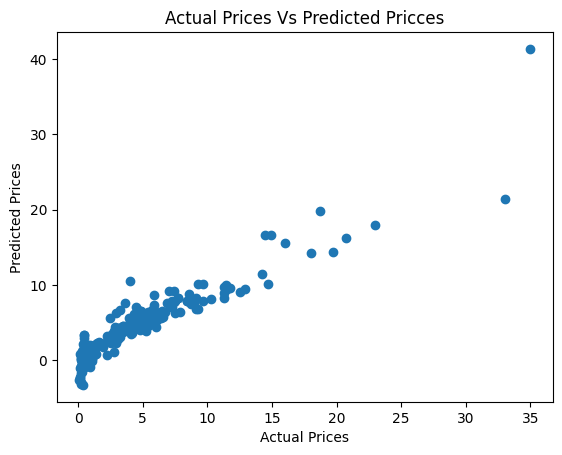

In [99]:
plt.scatter(Y_train , Y_train_pred)

plt.title("Actual Prices Vs Predicted Pricces")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")

plt.show()

Make Predictive System

In [100]:
# input_data  =(2013,	9.54	,43000	,1,	0,	0	,0)

# id_as_nparr  =  np.array(input_data)

# input_data_reshaped  = id_as_nparr.reshape(1,-1)


# prediction  = lin_reg_model.predict(input_data)

In [101]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0
